In [111]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta







In [112]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [113]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [114]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [115]:



df = getQuotes(frameM30, 2023)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1672617600,1.06959,1.07017,1.06936,1.06937,71,54,0
1,1672619400,1.06936,1.06965,1.06883,1.06892,2833,71,0
2,1672621200,1.06892,1.06978,1.06873,1.06968,212,54,0
3,1672623000,1.06968,1.07021,1.06957,1.07021,208,54,0
4,1672624800,1.07012,1.07052,1.06953,1.06965,220,22,0
...,...,...,...,...,...,...,...,...
7520,1691510400,1.09427,1.09557,1.09400,1.09470,3577,8,0
7521,1691512200,1.09470,1.09487,1.09329,1.09373,4771,8,0
7522,1691514000,1.09375,1.09444,1.09288,1.09441,4443,8,0
7523,1691515800,1.09441,1.09522,1.09406,1.09453,3609,8,0


In [116]:




def macd(df, shortEmaPeriod, longEmaPeriod, signalEmaPeriod):
    df[f'ema-{shortEmaPeriod}'] = ta.ema(df['close'], length=shortEmaPeriod)
    df[f'ema-{longEmaPeriod}'] = ta.ema(df['close'], length=longEmaPeriod)
    df['macdline'] = df[f'ema-{shortEmaPeriod}'] - df[f'ema-{longEmaPeriod}']
    df['macdsignal'] = ta.ema(df['macdline'], signalEmaPeriod)
    df['macdoscillator'] = df['macdline'] - df['macdsignal']
    return df





In [117]:


shortEmaPeriod = 12
longEmaPeriod = 26
signalEmaPeriod = 9

df = macd(df, shortEmaPeriod, longEmaPeriod, signalEmaPeriod)




In [118]:


df




,time,open,high,low,close,tick_volume,spread,real_volume,ema-12,ema-26,macdline,macdsignal,macdoscillator
0,1672617600,1.06959,1.07017,1.06936,1.06937,71,54,0,NaN,NaN,NaN,NaN,NaN
1,1672619400,1.06936,1.06965,1.06883,1.06892,2833,71,0,NaN,NaN,NaN,NaN,NaN
2,1672621200,1.06892,1.06978,1.06873,1.06968,212,54,0,NaN,NaN,NaN,NaN,NaN
3,1672623000,1.06968,1.07021,1.06957,1.07021,208,54,0,NaN,NaN,NaN,NaN,NaN
4,1672624800,1.07012,1.07052,1.06953,1.06965,220,22,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,1691510400,1.09427,1.09557,1.09400,1.09470,3577,8,0,1.095790,1.097092,-0.001302,-0.000951,-0.000351
7521,1691512200,1.09470,1.09487,1.09329,1.09373,4771,8,0,1.095473,1.096843,-0.001370,-0.001034,-0.000335
7522,1691514000,1.09375,1.09444,1.09288,1.09441,4443,8,0,1.095310,1.096663,-0.001353,-0.001098,-0.000255
7523,1691515800,1.09441,1.09522,1.09406,1.09453,3609,8,0,1.095190,1.096505,-0.001315,-0.001142,-0.000173


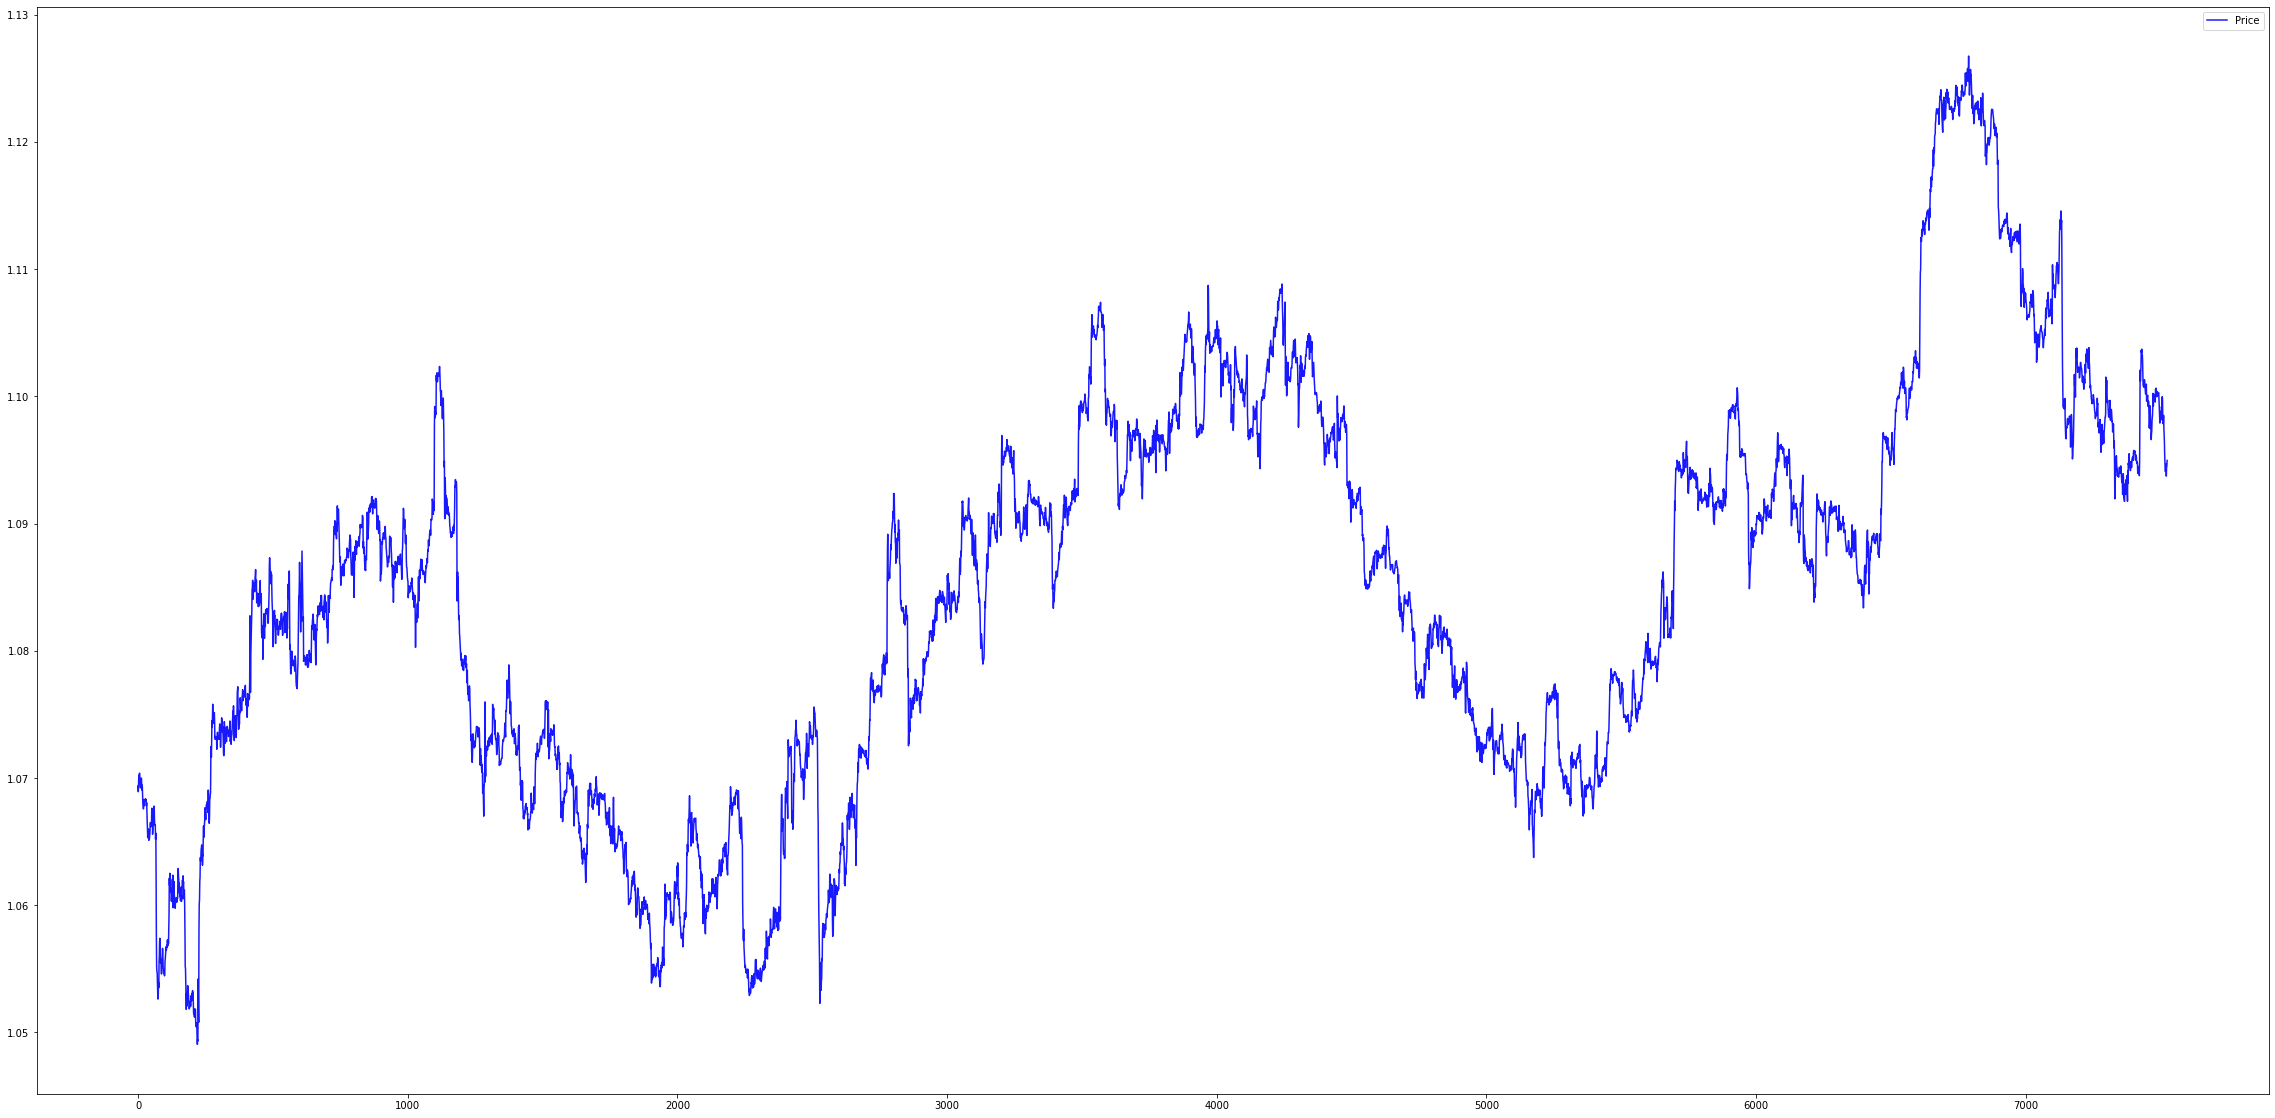

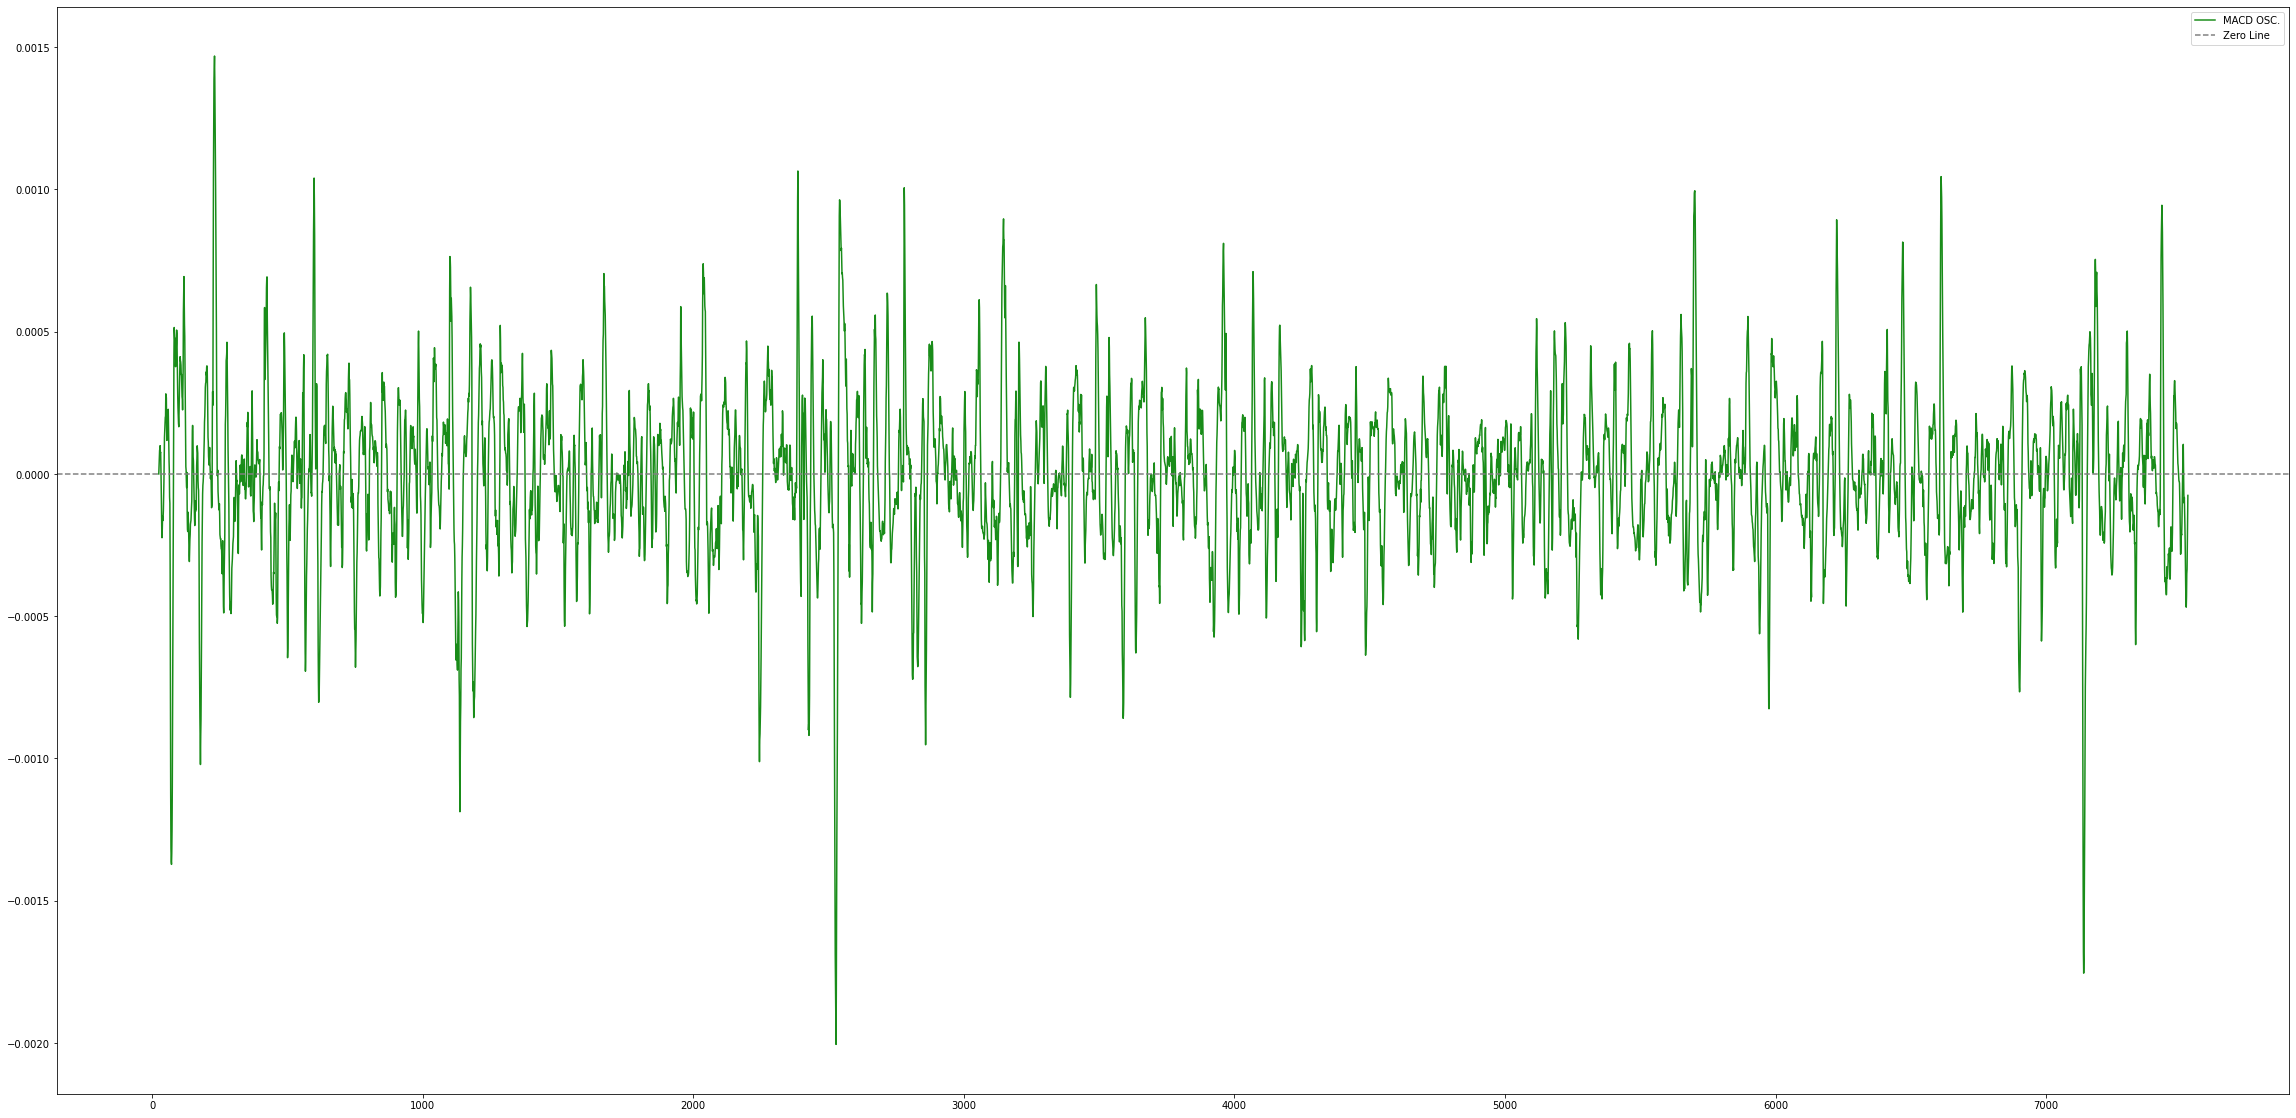

In [120]:


## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Price', c='blue', alpha=0.9)

# Showing the plot
plt.legend()
plt.show()



## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Oscillator.
plt.plot(df['macdoscillator'], label='MACD OSC.', c='green', alpha=0.9)
plt.axhline(y=0, color='gray', linestyle='--', label='Zero Line')


# Showing the plot
plt.legend()
plt.show()

